In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
DATA_FILE = 'uber-raw-data-may14.csv'
uber_data = pd.read_csv(DATA_FILE)
uber_data.head()

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02,40.7521,-73.9914,B02512
1,5/1/2014 0:06,40.6965,-73.9715,B02512
2,5/1/2014 0:15,40.7464,-73.9838,B02512
3,5/1/2014 0:17,40.7463,-74.0011,B02512
4,5/1/2014 0:17,40.7594,-73.9734,B02512


In [3]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652435 entries, 0 to 652434
Data columns (total 4 columns):
Date/Time    652435 non-null object
Lat          652435 non-null float64
Lon          652435 non-null float64
Base         652435 non-null object
dtypes: float64(2), object(2)
memory usage: 19.9+ MB


In [4]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M")
uber_data['DayOfWeekNum'] = uber_data['Date/Time'].dt.dayofweek
uber_data['DayOfWeek'] = uber_data['Date/Time'].dt.weekday_name
uber_data['MonthDayNum'] = uber_data['Date/Time'].dt.day
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour

Text(0.5, 1.0, 'Journeys by Week Day')

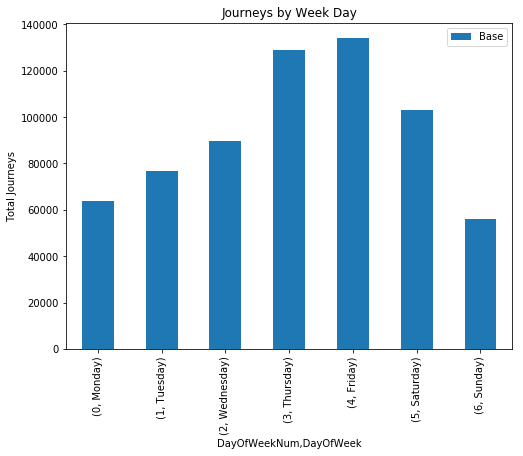

In [5]:
uber_weekdays = uber_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],values='Base',aggfunc='count')

uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day')


Text(0.5, 1.0, 'Journeys by Hour')

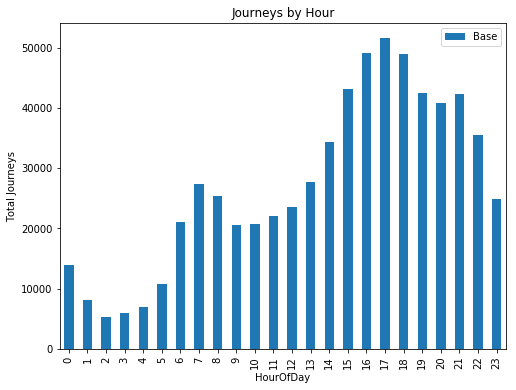

In [6]:
uber_hour = uber_data.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour')


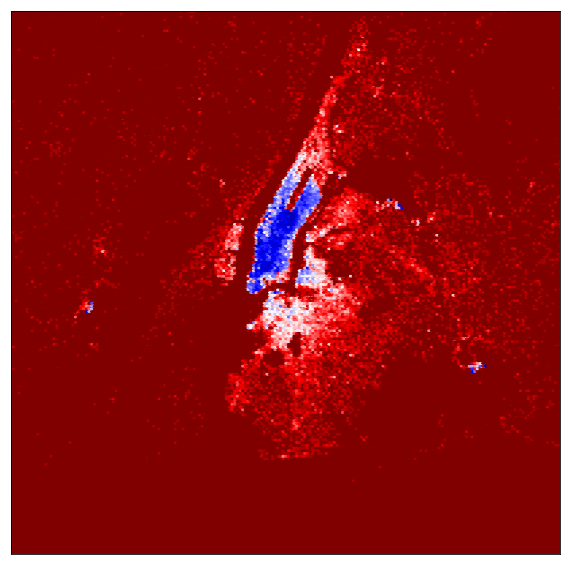

In [23]:
map = Basemap(projection='ortho', lat_0=0, lon_0=0)


west, south, east, north = -74.26, 40.50, -73.70, 40.92
#Most of the data of locations lies within the given ranges and Mercator projection as it is the most common

fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(111)

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='c')

x, y = m(uber_data['Lon'].values, uber_data['Lat'].values)

m.hexbin(x, y, gridsize=1000,bins='log', cmap='seismic_r')
